# 모집단, 표본, 확률변수

**기본 설정**

Numpy와 Pandas 라이브러리를 각각 np와 pd로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [5]:
import matplotlib.pyplot as plt

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [6]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**주요 내용**

구할 수 있는 또는 구해진 몇 개의 데이터만을 이용하여
전체 데이터에 대한 통계적 성질을 추측하는 추측통계의 기본 개념을 소개한다.

- 모집단
- 표본
- 표본추출
- 확률분포
- 확률변수

## 모집단과 표본

In [94]:
covar = np.array([[60, 55],
                  [55, 80]])

In [99]:
eng_math_scores = np.random.multivariate_normal([70, 60], covar, (500,))

In [ ]:
eng_math_scores500 = pd.DataFrame(eng_math_scores)

In [96]:
eng_math_scores.shape

(500, 2)

In [97]:
np.cov(eng_math_scores, rowvar=False, ddof=0)

array([[56.378555, 50.794954],
       [50.794954, 74.931003]])

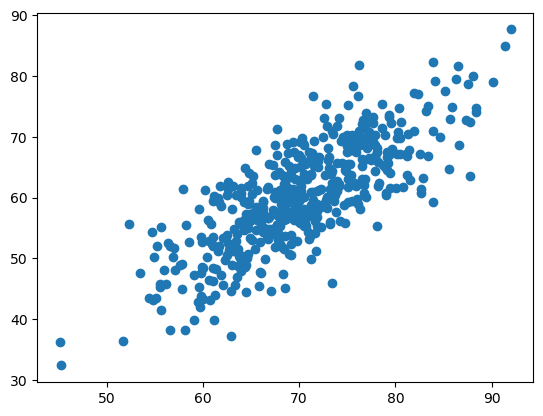

In [98]:
plt.scatter(eng_math_scores[:, 0], eng_math_scores[:, 1])

In [64]:
eng_math_scores_df.describe()

NameError: name 'eng_math_scores_df' is not defined

In [ ]:
plt.scatter

In [9]:
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균', sample.mean())

1번째 무작위 추출로 얻은 표본평균 72.45
2번째 무작위 추출로 얻은 표본평균 63.7
3번째 무작위 추출로 얻은 표본평균 66.05
4번째 무작위 추출로 얻은 표본평균 71.7
5번째 무작위 추출로 얻은 표본평균 74.15


## 확률 모델

### 확률분포

In [11]:
dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [13]:
np.random.choice(dice, p=prob)

4

In [14]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([6, 6, 5, 5, 6, 5, 2, 5, 6, 3, 5, 6, 6, 6, 5, 3, 3, 3, 5, 4, 6, 5,
       2, 2, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 4, 4, 6, 2, 3, 6, 6, 5, 4,
       5, 1, 4, 4, 6, 5, 4, 5, 6, 3, 6, 4, 6, 4, 5, 3, 6, 5, 3, 3, 6, 6,
       5, 3, 3, 5, 4, 6, 3, 3, 2, 6, 1, 6, 2, 3, 6, 6, 1, 3, 4, 5, 2, 5,
       1, 6, 6, 5, 3, 5, 5, 6, 5, 3, 4, 6])

In [16]:
freq, _ = np.histogram(sample, bins=6, range=(1, 7))
pd.DataFrame({'frequency':freq,
              'relative frequency':freq / num_trial},
              index = pd.Index(np.arange(1, 7), name='dice'))

,frequency,relative frequency
dice,,
1,4,0.04
2,7,0.07
3,17,0.17
4,12,0.12
5,28,0.28
6,32,0.32


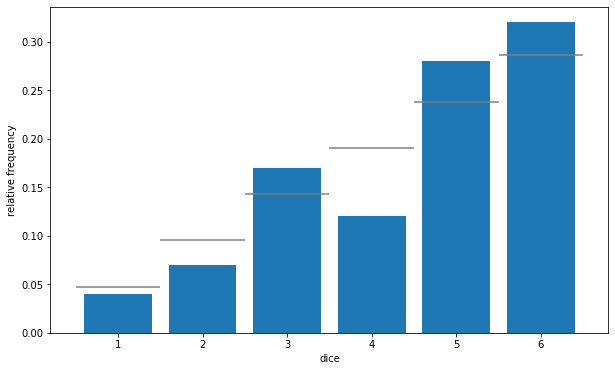

In [17]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

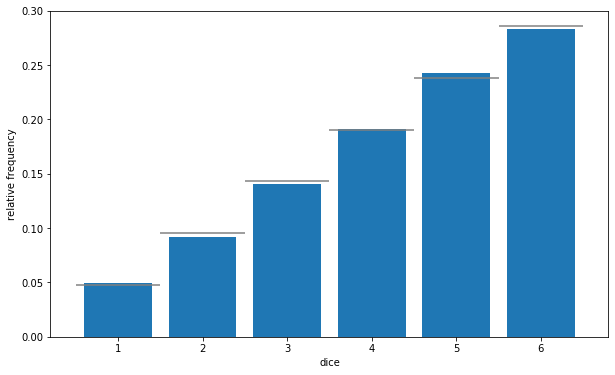

In [18]:
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

## 추측통계에서의 확률

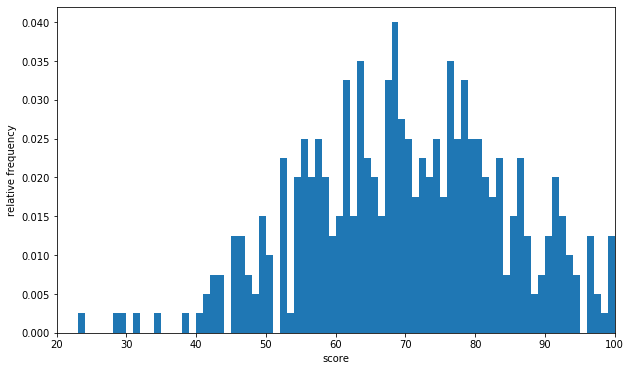

In [19]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

In [20]:
np.random.choice(scores)

63

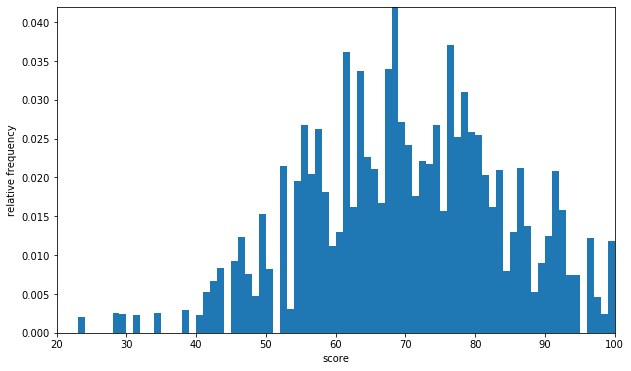

In [21]:
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

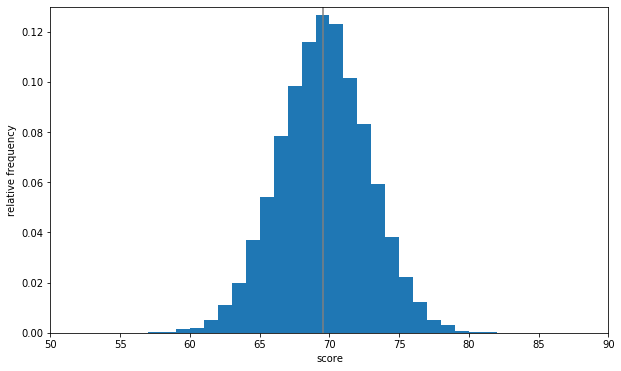

In [22]:
sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()